### Labor Data By Industry Analysis

In [2]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the National_Employment_Matrix_OCC_15-2051.csv

In [39]:
# Relative path from script to CSV
csv_path = "../../data/National_Employment_Matrix_OCC_15-2051.csv"

# Load the CSV

df = pd.read_csv(csv_path)

### Top 10 Industries Employing Data Scientists

C:\Users\julia\AppData\Local\Temp\ipykernel_39864\437983950.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industries["2024 Percent of Occupation"] = pd.to_numeric(
C:\Users\julia\AppData\Local\Temp\ipykernel_39864\437983950.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


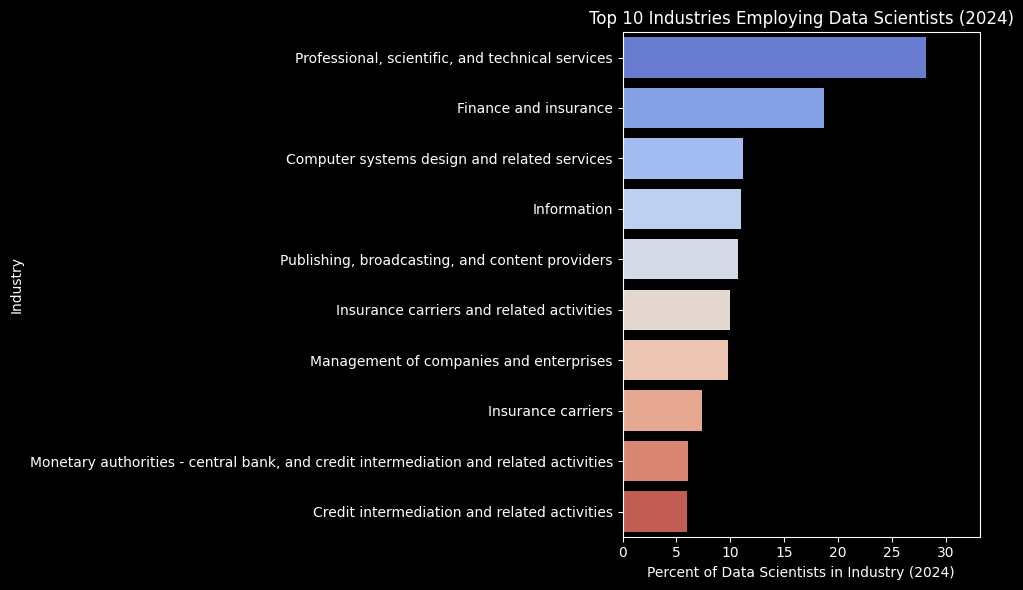

In [26]:
unique_industries = df["Industry Title"].unique()


df_industries = df[
    (df["Industry Title"] != "Total, all industries") &
    (df["Industry Title"] != "Total wage and salary employment")
]


# Ensure Percent of Occupation is numeric
df_industries["2024 Percent of Occupation"] = pd.to_numeric(
    df_industries["2024 Percent of Occupation"], errors='coerce'
)

# drop duplicates
df_industries = df_industries.drop_duplicates(subset="Industry Title")

# Get top 10 industries by 2024 Percent of Occupation
df_industries.loc[:, "2024 Percent of Occupation"] = pd.to_numeric(
    df_industries["2024 Percent of Occupation"], errors='coerce'
)

top10 = df_industries.nlargest(10, "2024 Percent of Occupation")

plt.figure(figsize=(10,6), facecolor='black')
ax = sns.barplot(
    x="2024 Percent of Occupation",
    y="Industry Title",
    data=top10,
    palette = "coolwarm"
)

# Set axes and text colors to white
ax.set_facecolor('black')               
ax.tick_params(colors='white')          
ax.xaxis.label.set_color('white')       
ax.yaxis.label.set_color('white')       
ax.title.set_color('white')             
for spine in ax.spines.values():        
    spine.set_color('white')

plt.xlabel("Percent of Data Scientists in Industry (2024)")
plt.ylabel("Industry")
plt.title("Top 10 Industries Employing Data Scientists (2024)")
plt.xlim(0, top10["2024 Percent of Occupation"].max() + 5)
plt.tight_layout()
plt.show()


### 10 Largest Growth in Data Science

                                        Industry Title  \
57   Other electrical equipment and component manuf...   
56   Electrical equipment, appliance, and component...   
227  Services for the elderly and persons with disa...   
133  Computing infrastructure providers, data proce...   
211                           Home healthcare services   
209  Outpatient mental health and substance abuse c...   
122                                Software publishers   
208                            Outpatient care centers   
163       Computer systems design and related services   
181                          Security systems services   

     Employment Percent Change, 2024-2034  
57                                   62.8  
56                                   52.0  
227                                  51.5  
133                                  50.6  
211                                  48.4  
209                                  48.2  
122                                  48.1  
208      

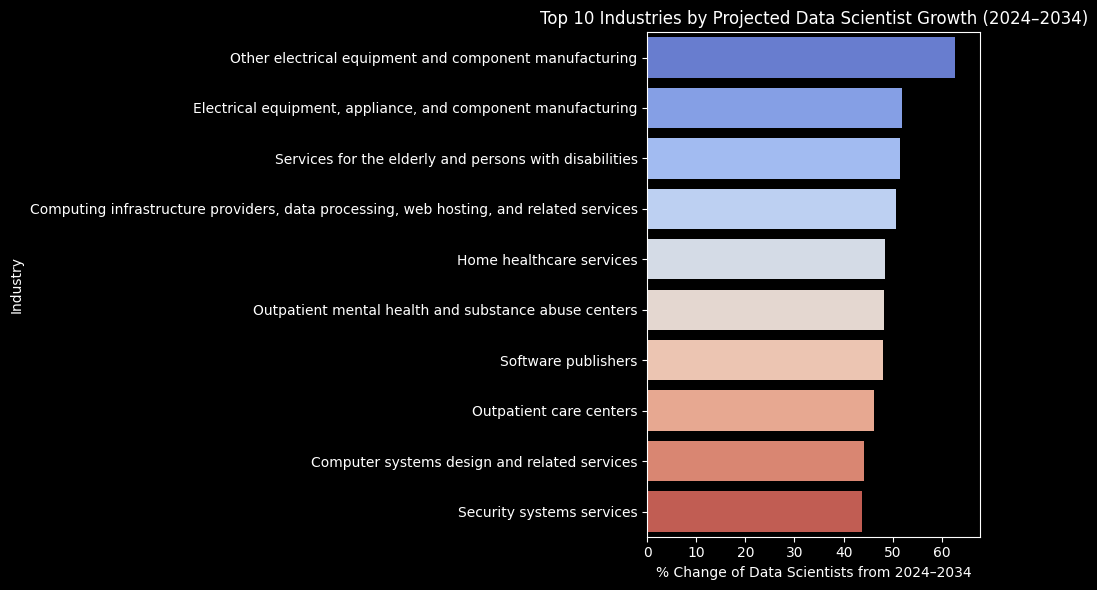

In [6]:
# Ensure column is numeric
df_industries = df_industries.copy()
df_industries.loc[:, "Employment Percent Change, 2024-2034"] = pd.to_numeric(
    df_industries["Employment Percent Change, 2024-2034"], errors='coerce'
)

# Get top 10 industries by employment percent change
top10_growth = df_industries.sort_values(
    by="Employment Percent Change, 2024-2034", ascending=False
).head(10)

# Plot
plt.figure(figsize=(10, 6), facecolor='black')
ax = sns.barplot(
    x="Employment Percent Change, 2024-2034",
    y="Industry Title",
    hue="Industry Title",        
    data=top10_growth,
    palette="coolwarm",
    legend=False
)

print(top10_growth[["Industry Title","Employment Percent Change, 2024-2034"]])

# Style (white text, dark background)
ax.set_facecolor('black')
ax.tick_params(colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
for spine in ax.spines.values():
    spine.set_color('white')

plt.xlabel("% Change of Data Scientists from 2024–2034")
plt.ylabel("Industry")
plt.title("Top 10 Industries by Projected Data Scientist Growth (2024–2034)")
plt.xlim(0, top10_growth["Employment Percent Change, 2024-2034"].max() + 5)
plt.tight_layout()
plt.show()

### 10 Lowest Projected Growth in Data Science

                                     Industry Title  \
14            Fossil fuel electric power generation   
33                            Apparel manufacturing   
60                Motor vehicle parts manufacturing   
1                             Self-employed workers   
125                            Newspaper publishers   
238      Gambling industries (except casino hotels)   
35                Pulp, paper, and paperboard mills   
36          Printing and related support activities   
230              Vocational rehabilitation services   
237  Amusement, gambling, and recreation industries   

     Employment Percent Change, 2024-2034  
14                                  -12.6  
33                                   -8.7  
60                                   -1.8  
1                                    -1.0  
125                                   2.6  
238                                   7.7  
35                                    8.4  
36                                    9.2 

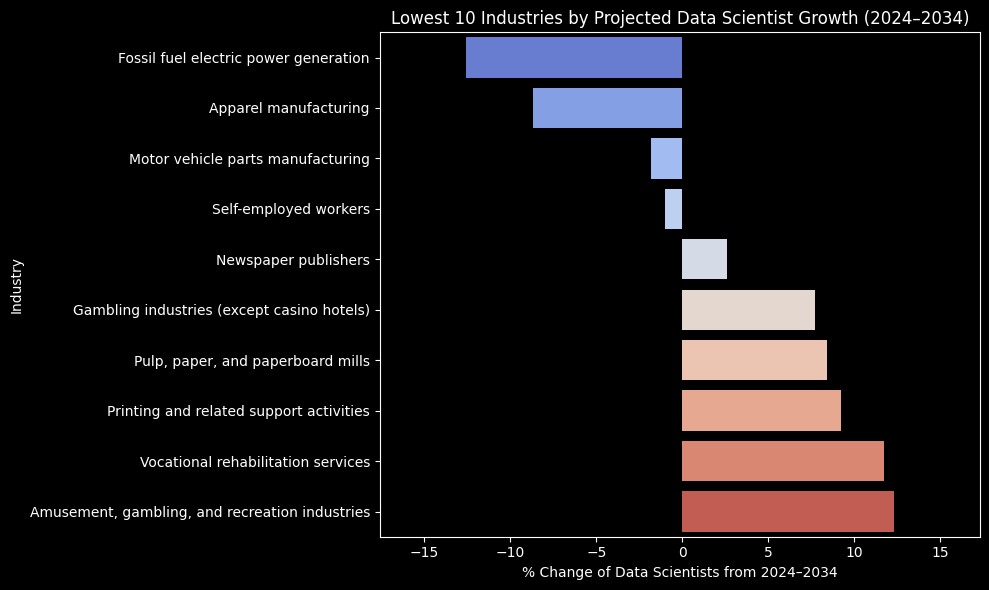

In [9]:
# Ensure column is numeric
df_industries = df_industries.copy()
df_industries.loc[:, "Employment Percent Change, 2024-2034"] = pd.to_numeric(
    df_industries["Employment Percent Change, 2024-2034"], errors='coerce'
)

# Get bottom 10 industries by employment percent change
top10_drop = df_industries.sort_values(
    by="Employment Percent Change, 2024-2034", ascending=True
).head(10)

# Plot
plt.figure(figsize=(10, 6), facecolor='black')
ax = sns.barplot(
    x="Employment Percent Change, 2024-2034",
    y="Industry Title",
    hue="Industry Title",         
    data=top10_drop,
    palette="coolwarm",
    legend=False
)

print(top10_drop[["Industry Title","Employment Percent Change, 2024-2034"]])

# Style (white text, dark background)
ax.set_facecolor('black')
ax.tick_params(colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
for spine in ax.spines.values():
    spine.set_color('white')

plt.xlabel("% Change of Data Scientists from 2024–2034")
plt.ylabel("Industry")
plt.title("Lowest 10 Industries by Projected Data Scientist Growth (2024–2034)")
plt.xlim(
    top10_drop["Employment Percent Change, 2024-2034"].min() - 5,
    top10_drop["Employment Percent Change, 2024-2034"].max() + 5
)
plt.tight_layout()
plt.show()

### Supersector Mapping

In [52]:
def get_supersector(code):
    code_str = str(code).strip()  
    
    if code_str in ["TE1000", "TE1100", "TE1200"]:
        return "Summary / Total"
    
    # Remove non-digit characters
    numeric_code = "".join(filter(str.isdigit, code_str))


    # Get prefix
    prefix = numeric_code[:2] if len(numeric_code) >= 2 else ""

    mapping = {
        "11": "Agriculture",
        "21": "Mining, Quarrying, Oil & Gas",
        "22": "Utilities",
        "23": "Construction",
        "31": "Manufacturing",
        "32": "Manufacturing",
        "33": "Manufacturing",
        "42": "Wholesale Trade",
        "44": "Retail Trade",
        "45": "Retail Trade",
        "48": "Transportation & Warehousing",
        "49": "Transportation & Warehousing",
        "51": "Information",
        "52": "Finance & Insurance",
        "53": "Real Estate & Rental & Leasing",
        "54": "Professional, Scientific & Technical Services",
        "55": "Management of Companies",
        "56": "Administrative & Support & Waste Management",
        "61": "Educational Services",
        "62": "Healthcare & Social Assistance",
        "71": "Arts, Entertainment & Recreation",
        "72": "Accommodation & Food Services",
        "81": "Other Services",
        "90": "Government",
        "91": "Government",
        "92": "Government",
        "93": "Government",
        "99": "Government",
    }

    return mapping.get(prefix, "Other / Unknown")

df["Supersector"] = df["Industry Code"].apply(get_supersector)

print(df["Supersector"])

0      Other / Unknown
1          Agriculture
2      Other / Unknown
3          Agriculture
4          Agriculture
            ...       
255         Government
256         Government
257         Government
258         Government
259         Government
Name: Supersector, Length: 260, dtype: object


Color Mapping for Scatterplot

In [56]:
color_map = {
    "Agriculture": "#4CAF50",                    # green
    "Mining, Quarrying, Oil & Gas": "#795548",   # brown
    "Utilities": "#03A9F4",                      # light blue
    "Construction": "#FF9800",                   # orange
    "Manufacturing": "#9C27B0",                  # purple
    "Wholesale Trade": "#8D6E63",                # taupe
    "Retail Trade": "#E91E63",                   # hot pink
    "Transportation & Warehousing": "#00BCD4",   # cyan
    "Information": "#673AB7",                    # deep purple
    "Finance & Insurance": "#2196F3",            # blue
    "Real Estate & Rental & Leasing": "#009688", # teal
    "Professional, Scientific & Technical Services": "#FFC107",  # amber
    "Management of Companies": "#FF5722",        # deep orange
    "Administrative & Support & Waste Management": "#CDDC39",    # lime
    "Educational Services": "#3F51B5",           # indigo
    "Healthcare & Social Assistance": "#F44336", # red
    "Arts, Entertainment & Recreation": "#BA68C8", # lavender
    "Accommodation & Food Services": "#FFB300",    # golden yellow
    "Other Services": "#AED581",                # light green
    "Government": "#607D8B"                     # blue-grey
}

df["Color"] = df["Supersector"].map(color_map)



In [ ]:
### Scatterplot of Percent of Employment (X) and Growth (Y)

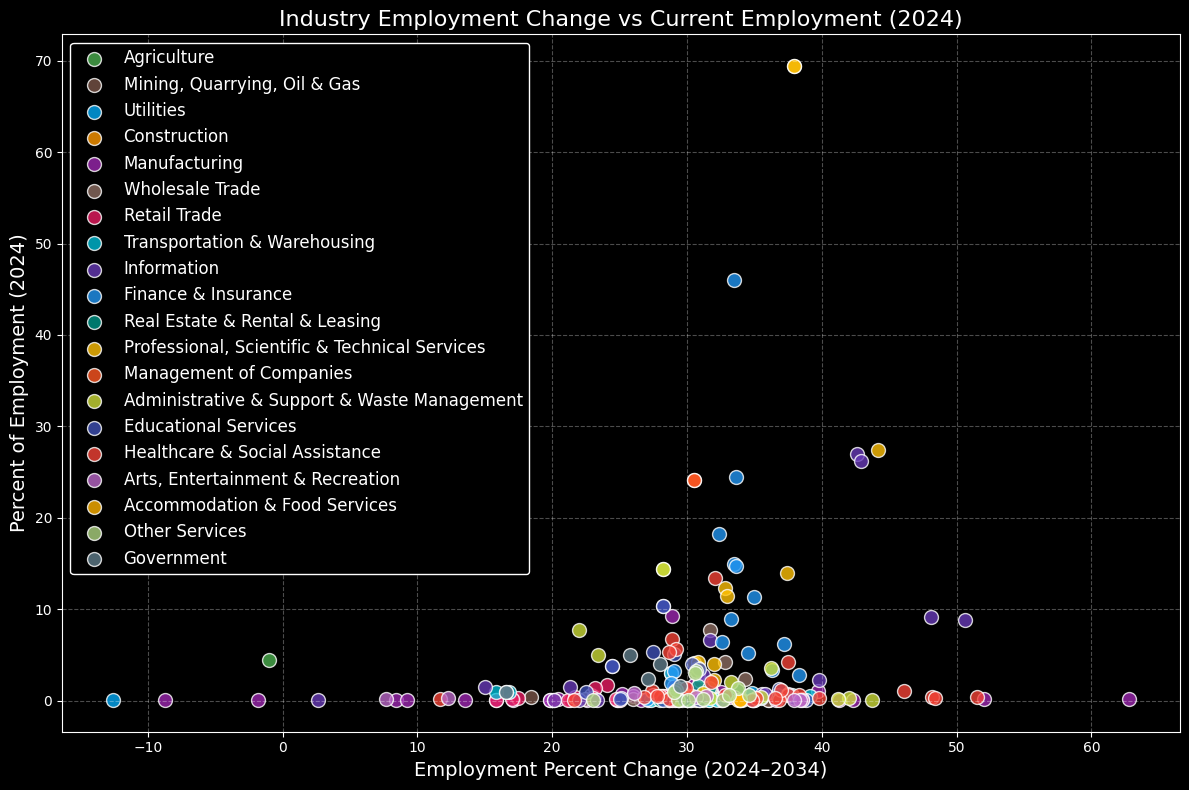

                                      Supersector  \
8                  Healthcare & Social Assistance   
0                   Accommodation & Food Services   
6                             Finance & Insurance   
14  Professional, Scientific & Technical Services   
1     Administrative & Support & Waste Management   
9                                     Information   
4                                    Construction   
17                   Transportation & Warehousing   
13                                 Other Services   
10                        Management of Companies   
19                                Wholesale Trade   
5                            Educational Services   
15                 Real Estate & Rental & Leasing   
12                   Mining, Quarrying, Oil & Gas   
3                Arts, Entertainment & Recreation   
11                                  Manufacturing   
16                                   Retail Trade   
7                                      Governm

In [61]:
df_plot = df.copy()

# Remove summary rows
df_plot = df_plot[~df_plot["Industry Title"].isin([
    "Total, all industries",
    "Total wage and salary employment"
])].copy()

# Map colors
df_plot["Color"] = df_plot["Supersector"].map(color_map)

plt.figure(figsize=(12,8), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

# Scatter
for supersector in df_plot["Supersector"].unique():
    subset = df_plot[df_plot["Supersector"] == supersector]
    plt.scatter(
        subset["Employment Percent Change, 2024-2034"],
        subset["2024 Employment"],
        color=color_map.get(supersector, "#FFFFFF"),  # fallback to white
        label=supersector,
        s=100, alpha=0.8, edgecolors='w'
    )

# Axes and title
plt.xlabel("Employment Percent Change (2024–2034)", color='white', fontsize=14)
plt.ylabel("Percent of Employment (2024)", color='white', fontsize=14)
plt.title("Industry Employment Change vs Current Employment (2024)", color='white', fontsize=16)

# Ticks and spines
ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_color('white')

# Legend
plt.legend(facecolor='black', edgecolor='white', fontsize=12, framealpha=1)

leg = plt.legend(facecolor='black', edgecolor='white', fontsize=12, framealpha=1)

# Make legend text white
for text in leg.get_texts():
    text.set_color("white")

# Make legend title white (if present)
if leg.get_title():
    leg.get_title().set_color("white")

plt.grid(True, linestyle='--', alpha=0.3, color='white')
plt.tight_layout()
plt.show()

summary = (
    df_plot.groupby("Supersector")
           .agg({
               "Employment Percent Change, 2024-2034": "mean",
               "2024 Employment": "mean"
           })
           .reset_index()

    
)
summary = summary.sort_values(
    by="Employment Percent Change, 2024-2034",
    ascending=False
)
print(summary)

In [ ]:
def get_supersector(code):
    code_str = str(code).strip()  
    
    if code_str in ["TE1000", "TE1100", "TE1200"]:
        return "Summary / Total"
    
    # Remove non-digit characters
    numeric_code = "".join(filter(str.isdigit, code_str))


    # Get prefix
    prefix = numeric_code[:2] if len(numeric_code) >= 2 else ""

    mapping = {
        "11": "Agriculture",
        "21": "Mining, Quarrying, Oil & Gas",
        "22": "Utilities",
        "23": "Construction",
        "31": "Manufacturing",
        "32": "Manufacturing",
        "33": "Manufacturing",
        "42": "Wholesale Trade",
        "44": "Retail Trade",
        "45": "Retail Trade",
        "48": "Transportation & Warehousing",
        "49": "Transportation & Warehousing",
        "51": "Information",
        "52": "Finance & Insurance",
        "53": "Real Estate & Rental & Leasing",
        "54": "Professional, Scientific & Technical Services",
        "55": "Management of Companies",
        "56": "Administrative & Support & Waste Management",
        "61": "Educational Services",
        "62": "Healthcare & Social Assistance",
        "71": "Arts, Entertainment & Recreation",
        "72": "Accommodation & Food Services",
        "81": "Other Services",
        "90": "Government",
        "91": "Government",
        "92": "Government",
        "93": "Government",
        "99": "Government",
    }

    return mapping.get(prefix, "Other / Unknown")

df["Supersector"] = df["Industry Code"].apply(get_supersector)

print(df["Supersector"])

0      Other / Unknown
1          Agriculture
2      Other / Unknown
3          Agriculture
4          Agriculture
            ...       
255         Government
256         Government
257         Government
258         Government
259         Government
Name: Supersector, Length: 260, dtype: object
